# COVID

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotnine
from plotnine import *

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
casos = pd.read_csv('./casos_hosp_uci_def_sexo_edad_provres.csv')

In [ ]:
casos['fecha']= pd.to_datetime(casos['fecha'])

In [ ]:
casos['year'] = casos['fecha'].dt.year

## CASO GENERAL

In [ ]:
prov = {'Andalucía': ['AL', 'CA', 'CO', 'GR', 'H', 'J', 'MA', 'SE'],'Aragón': ['HU', 'TE', 'Z'], 'Asturias': ['O'],'Baleares': ['PM'], 'Canarias': ['GC', 'TF'], 'Cantabria': ['S'], 'Castilla-La Mancha': ['AB', 'CR', 'CU', 'GU', 'TO'], 'Castilla y León': ['A', 'AV', 'BU', 'LE', 'P', 'SA', 'SG', 'SO', 'VA', 'ZA'],'Cataluña': ['B', 'GI', 'L', 'T'],'Ceuta y Melilla': ['CE', 'ML'],'Comunidad Valenciana': ['A', 'CS', 'V'],'Extremadura': ['BA', 'CC', 'C', 'BA', 'CC', 'C', 'BA', 'CC', 'C', 'BA', 'CC', 'C'],'Galicia': ['C', 'LU','PO'],'La Rioja': ['LO'],'Madrid': ['M'],'Navarra': ['NA'],'País Vasco': ['BI', 'SS', 'VI']}
casos['comunidad'] = casos['provincia_iso'].map({prov: comunidad for comunidad, prov_list in prov.items() for prov in prov_list})

In [ ]:
casos_fecha = casos.groupby('fecha').sum().reset_index()

fig = px.line(casos_fecha, x='fecha', y='num_casos')
fig2 = px.line(casos_fecha, x='fecha', y='num_def')
fig2.update_traces(line_color='red')
fig.show()
fig2.show()

* Podemos observar como al principio de la pandemia se registran un menor número de casos debido a la falta de sistemas para recabarlo, pero si se registraron las defunciones, que alcanzaron su mayor pico. Después en las sucesivas olas se registran menor número de muertes pero con un aumento del registro de casos. Por último en 2022 se llevaba un conteo efectivo de los casos y aunque aumentaron se frenaron las muertes gracias a la vacunación. 

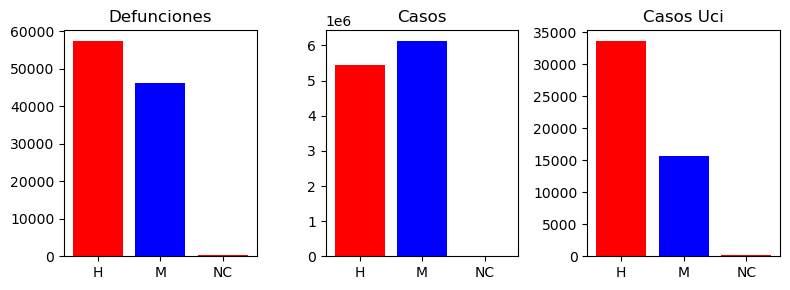

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8,3))

num_casos_por_sexo = casos.groupby('sexo')['num_def'].sum()
ax[0].bar(num_casos_por_sexo.index, num_casos_por_sexo, color=['red', 'blue'])
ax[0].set_title('Defunciones')

num_casos_por_sexo2 = casos.groupby('sexo')['num_casos'].sum()
ax[1].bar(num_casos_por_sexo2.index, num_casos_por_sexo2, color=['red', 'blue'])
ax[1].set_title('Casos')

num_casos_por_sexo3 = casos.groupby('sexo')['num_uci'].sum()
ax[2].bar(num_casos_por_sexo3.index, num_casos_por_sexo3, color=['red', 'blue'])
ax[2].set_title('Casos Uci')

fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

plt.tight_layout()

plt.show()

* Se observa un fenómeno curioso. A pesar de que hay más mujeres infectadas, hay más hombres ingresados en uci y más muertes de hombres. A su vez no tantas de las mujeres que murieron a causa de covid fueron ingresadas en Uci.

In [ ]:
casos_edad_sexo = casos.groupby(['grupo_edad', 'year']).sum().reset_index()
fig = px.scatter(casos_edad_sexo, x='grupo_edad', y='num_hosp', size='num_casos', color='num_def', size_max=80, animation_frame="year", range_color=[0, 30000])

fig["layout"].pop("updatemenus")
fig.write_html("my_plot.html")
fig.show()

* El grupo más castigado por la pandemia fueron aquellos mayores de 80 años, con mayor número de defunciones y hospitalizados. Por otra parte no fueron los que más casos registraban, por lo que su tasa de superviviencia fue menor. 

## CASO POR COMUNIDADES AUTONOMAS

In [ ]:
datos_por_comunidad = casos.groupby(['fecha', 'comunidad']).sum().reset_index()

fig = px.line(datos_por_comunidad, x='fecha', y='num_casos', color='comunidad')
fig2 = px.line(datos_por_comunidad, x='fecha', y='num_def', color='comunidad')
fig.show()
fig2.show()

* Las comunidades con mayor número de defunciones al principio de la pandemia fueron Madrid y Cataluña, entendible debido a la alta densidad de población que registran. A su vez en 2022 con la oleada de contagios también fueron las que más tuvieron, especialmente Cataluña. Más adelante estudiaremos este caso con más detalle. 

In [ ]:
casos_comunidad_edad = casos.groupby(['comunidad','grupo_edad']).sum().reset_index()
fig = px.bar(casos_comunidad_edad, x='grupo_edad', y='num_casos', color='comunidad')
fig.show()

* A su vez la distribución por edad en el número de contagios se mantiene equitativa al total en cada comunidad autónoma. 

## CASO MADRID Y CATALUÑA

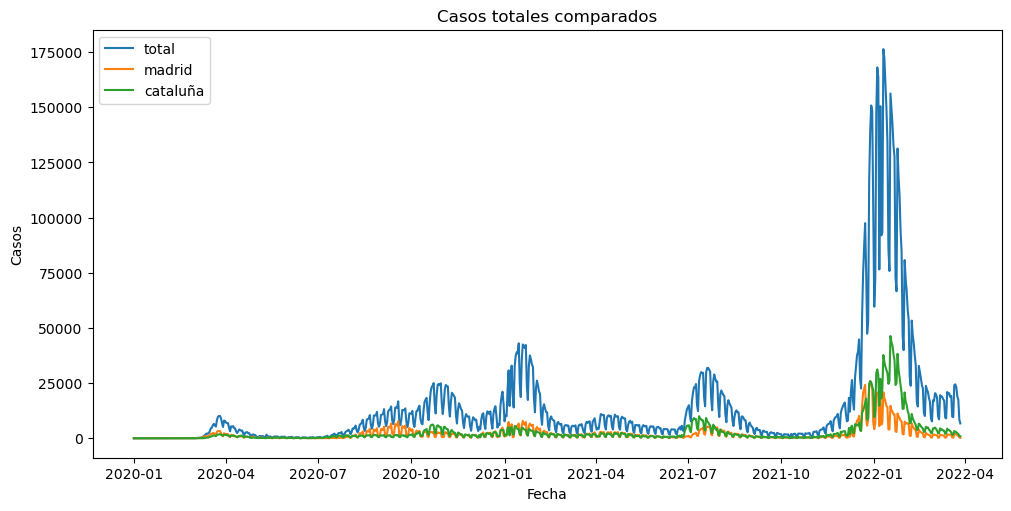

In [ ]:
madrid = casos.loc[casos['comunidad']=='Madrid', :]
madrid= madrid.groupby('fecha').sum().reset_index()

cat = casos.loc[casos['comunidad']=='Cataluña', :]
cat= cat.groupby('fecha').sum().reset_index()

plt.figure(figsize=(10, 5), layout='constrained')
plt.plot(casos_fecha['fecha'], casos_fecha['num_casos'], label='total')  # etc.
plt.plot(madrid['fecha'], madrid['num_casos'], label='madrid')
plt.plot(cat['fecha'], cat['num_casos'], label='cataluña')
plt.xlabel('Fecha')
plt.ylabel('Casos')
plt.title("Casos totales comparados")
plt.legend()

* Madrid logró controlar más su cifra de contagios en el 2022, mientras que Cataluña experimentó un mayor crecimiento. Ambas contribuyen a un gran número de casos a nivel nacional. 

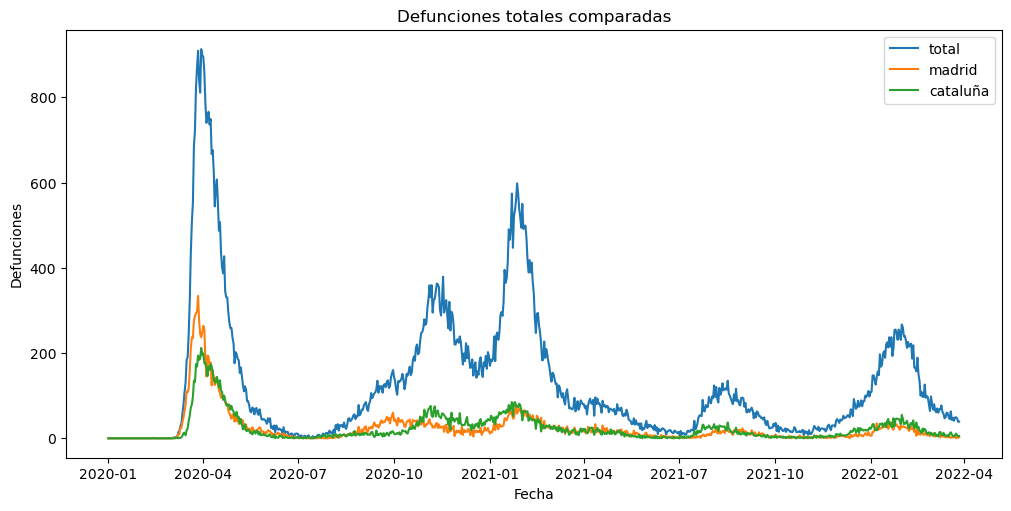

In [ ]:
plt.figure(figsize=(10, 5), layout='constrained')
plt.plot(casos_fecha['fecha'], casos_fecha['num_def'], label='total')  # etc.
plt.plot(madrid['fecha'], madrid['num_def'], label='madrid')
plt.plot(cat['fecha'], cat['num_def'], label='cataluña')
plt.xlabel('Fecha')
plt.ylabel('Defunciones')
plt.title("Defunciones totales comparadas")
plt.legend()

* Por otra parte al inicio de la pandemia Madrid fue más castigada en el número de defunciones registrando valores más altos. A finales de 2020, comienzan los últimos picos para después estabilizarse. 

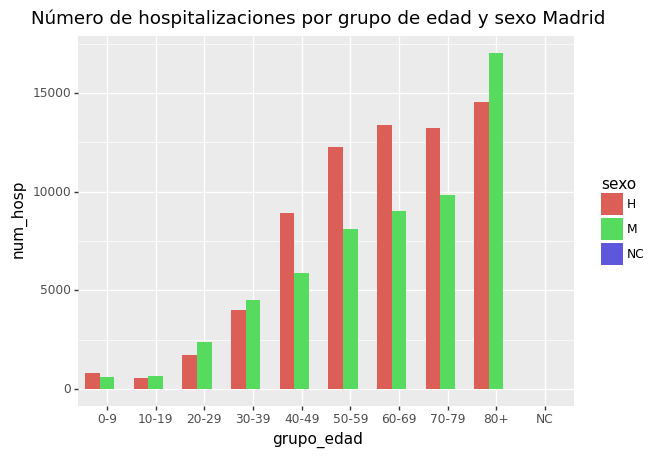

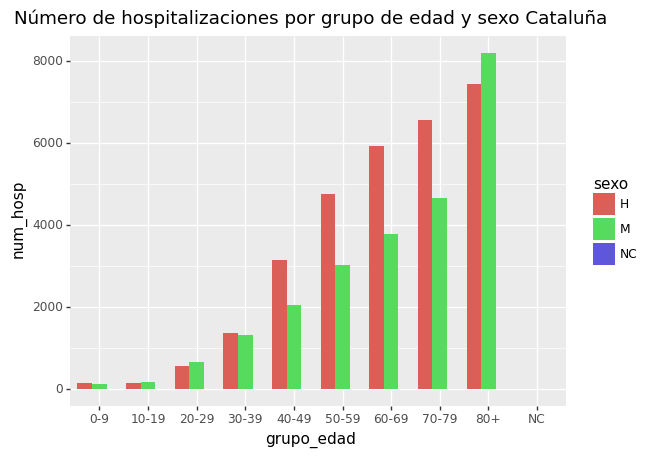

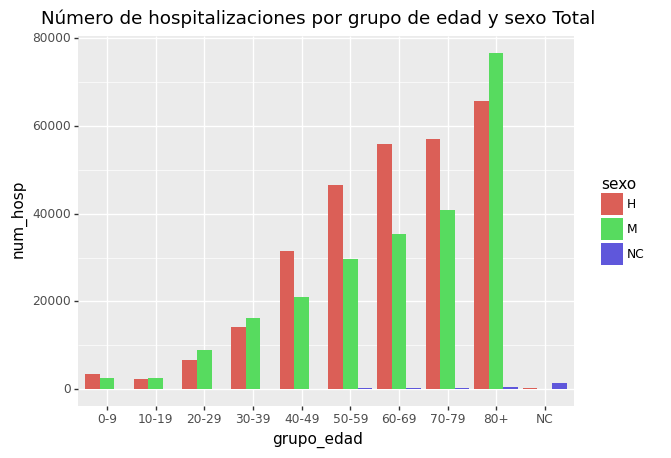

(<ggplot: (8770896190943)>,
 <ggplot: (8770896180384)>,
 <ggplot: (8770894936164)>)

In [ ]:
madrid_sexo = casos.loc[casos['comunidad']=='Madrid', :]
cataluña_sexo = casos.loc[casos['comunidad']=='Cataluña', :]

covid= madrid_sexo.groupby(['grupo_edad', 'sexo']).sum().reset_index()
covid2= cataluña_sexo.groupby(['grupo_edad', 'sexo']).sum().reset_index()
covid3 = casos.groupby(['grupo_edad', 'sexo']).sum().reset_index()

p1 = (
      ggplot(covid)  # What data to use
    + aes('grupo_edad', 
          'num_hosp',
          fill = 'sexo')  
    + geom_bar(stat = "identity",
              position = 'dodge')
    + labs(title="Número de hospitalizaciones por grupo de edad y sexo Madrid")
                            
)

p2 = (
    ggplot(covid2)  # What data to use
    + aes('grupo_edad', 
          'num_hosp',
          fill = 'sexo')  # What variable to use
    + geom_bar(stat = "identity",
              position = 'dodge') # Geometric object to use for drawing
    + labs(title="Número de hospitalizaciones por grupo de edad y sexo Cataluña")
)

p3 = (
    ggplot(covid3)  # What data to use
    + aes('grupo_edad', 
          'num_hosp',
          fill = 'sexo')  # What variable to use
    + geom_bar(stat = "identity",
              position = 'dodge') # Geometric object to use for drawing
    + labs(title="Número de hospitalizaciones por grupo de edad y sexo Total")
)
p1, p2, p3

* Por último observamos la distribución de sexo por edad. Se asemejan mucho al total, a excepción de las tasas de hospitalizados de 0-9 años en Cataluña. Esto podría deberse o bien a una mejor gestión general o menores tasas de natalidad en Cataluña, pero no se puede asegurar con certeza puesto que requeriría un estudio en mayor profundidad de dicha cuestión. 

## EXTRA

In [ ]:
pob_esp2021 = pd.read_csv('2915bsc.csv', sep=';', encoding='latin-1')

In [ ]:
pob_esp2021['comunidad'] = pob_esp2021['Comunidades y Ciudades Autónomas'].map({'01 Andalucía': 'Andalucía','02 Aragón': 'Aragón','03 Asturias, Principado de': 'Asturias','04 Balears, Illes': 'Baleares','05 Canarias': 'Canarias','06 Cantabria': 'Cantabria','07 Castilla y León': 'Castilla y León','08 Castilla - La Mancha': 'Castilla-La Mancha','09 Cataluña': 'Cataluña','10 Comunitat Valenciana': 'Comunidad Valenciana','11 Extremadura': 'Extremadura','12 Galicia': 'Galicia','13 Madrid, Comunidad de': 'Madrid','14 Murcia, Región de': 'Murcia','15 Navarra, Comunidad Foral de': 'Navarra','16 País Vasco': 'País Vasco','17 Rioja, La': 'La Rioja','18 Ceuta': 'Ceuta y Melilla','19 Melilla': 'Ceuta y Melilla'})


In [ ]:
año_2021 = casos.loc[casos['year']==2021,:].drop(columns=['provincia_iso', 'sexo'])
año_2021 = año_2021.groupby(['comunidad', 'grupo_edad']).sum().reset_index()

casos_pob_2021 = pd.merge(año_2021, pob_esp2021, how='left', on='comunidad')
casos_pob_2021.drop(columns=['Tamaño de los municipios', 'Comunidades y Ciudades Autónomas', 'year'], inplace=True)

In [ ]:
casos_pob_2021['Total'] = casos_pob_2021['Total'].str.replace('.', '').astype('int')
casos_pob_2021['incidencia'] = casos_pob_2021['num_casos']/casos_pob_2021['Total']

/var/folders/33/s3nf28ls3b7g4w_54pzn00hm0000gn/T/ipykernel_47287/1685747166.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



<AxesSubplot:xlabel='grupo_edad', ylabel='comunidad'>

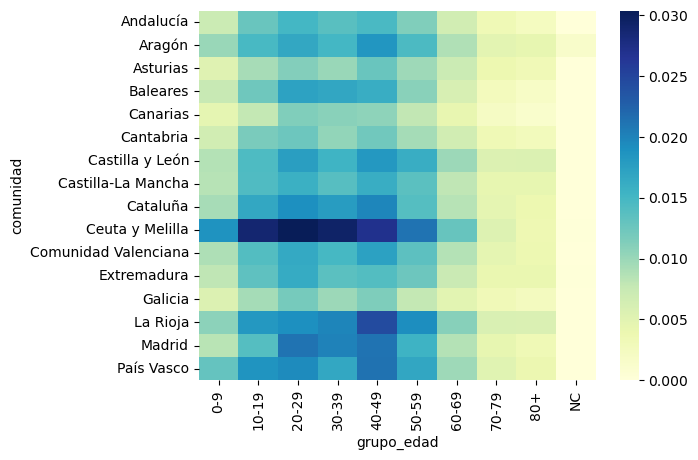

In [ ]:
datos_group = casos_pob_2021.groupby(['comunidad', 'grupo_edad']).mean().reset_index()
datos_pivot = datos_group.pivot('comunidad', 'grupo_edad', 'incidencia')
sns.heatmap(datos_pivot, cmap='YlGnBu')


* Como extra y para finalizar he analizado la incidencia por comunidad autónoma de 2021. Curiosamente la que registra mayor incidencia es Ceuta y Melilla, quizás por la baja densidad de población que registran

## Conclusion: 
Espero que este trabajo haya ilustrado de manera concisa la evolución del covid y algunas de las demografías más afectadas por la pandemia. Gracias por leerlo. 

@Autor: Samuel De La Mata Delgado